### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [243]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [257]:
class term_colors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
print(f'{term_colors.OKCYAN}Total rows in dataset:{term_colors.ENDC}')
print(data.count().max())
print(f'\n{term_colors.OKCYAN}Counts of columns with missing data:{term_colors.ENDC}')
print(data.count()[data.count() != 12684])
print(f'{term_colors.OKCYAN}\nUnique values in the \'car\' column:{term_colors.ENDC}')
car_indices = data[['car']].value_counts().index
for idx in car_indices:
    print(idx[0])

Total rows in dataset:
12684

Counts of columns with missing data:
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
dtype: int64

Unique values in the 'car' column:
Mazda5
Scooter and motorcycle
do not drive
Car that is too old to install Onstar :D
crossover


3. Decide what to do about your missing data -- drop, replace, other...

In [258]:
# fix misspelling
data = data.rename(columns={'passanger':'passenger'})
# drop the 'car' column, as it seems like junk data
data = data.drop(['car'], axis=1)
# 'nan' values exist only in the columns relating to frequency of visiting different establishments
# so we'll change them all to the same value
data.fillna('No answer', inplace=True)

4. What proportion of the total observations chose to accept the coupon? 



56.84% of coupons were accepted in total


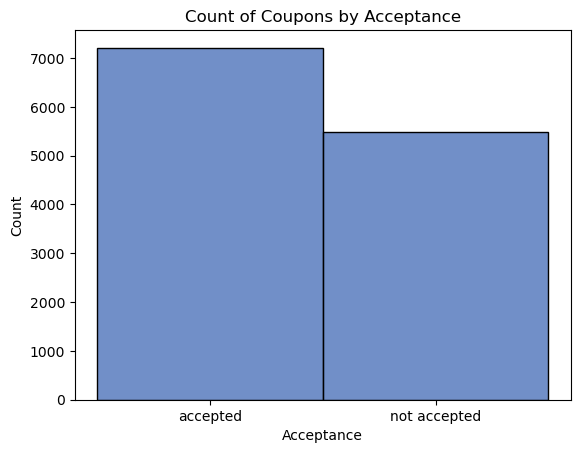

In [260]:
acceptance_rate = data[data['Y'] == 1]['Y'].count() / data['Y'].count()
sns.histplot(data['Y'].replace({1: 'accepted', 0: 'not accepted'}), color='#416ab6')
plt.xlabel('Acceptance')
plt.title('Count of Coupons by Acceptance')
print(f'{term_colors.OKCYAN}{round(acceptance_rate*100,2)}%{term_colors.ENDC} of coupons were accepted in total')

5. Use a bar plot to visualize the `coupon` column.

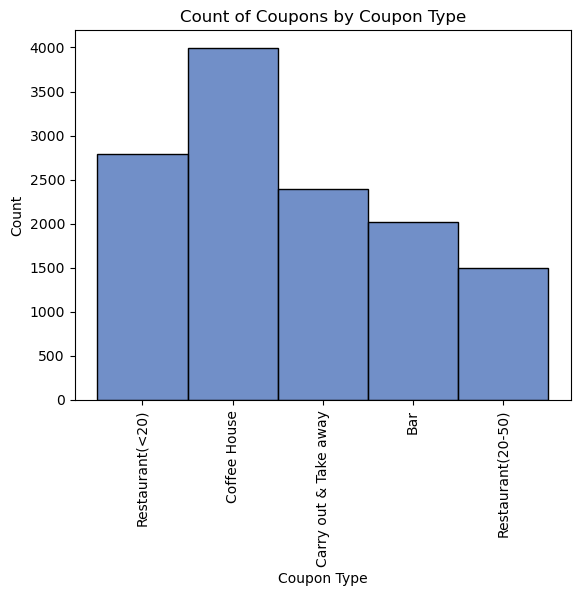

In [266]:
sns.histplot(data=data, x='coupon', color='#416ab6')
plt.xlabel('Coupon Type')
plt.title('Count of Coupons by Coupon Type')
plt.xticks(rotation=90)
plt.show()

6. Use a histogram to visualize the temperature column.

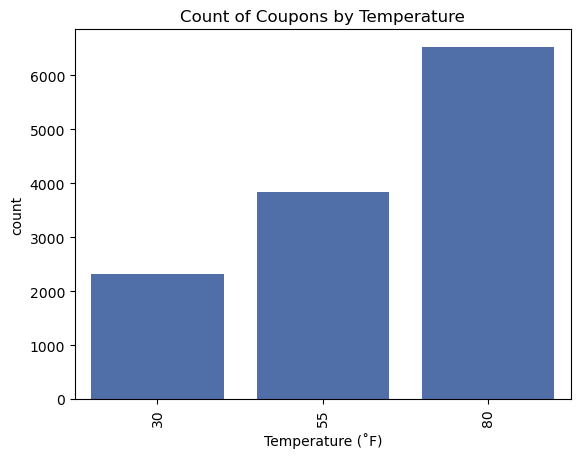

In [267]:
# there are only three distinct values in the `temperature` column
sns.countplot(data=data, x='temperature', color='#416ab6')
plt.xticks(rotation=90)
plt.title('Count of Coupons by Temperature')
plt.xlabel('Temperature (˚F)')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
just_bar_coupons = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


41.0% of bar coupons were accepted


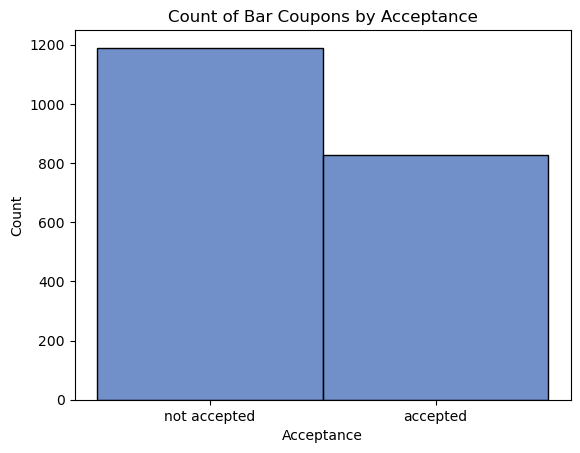

In [268]:
# graph the count of bar coupons by acceptance
sns.histplot(just_bar_coupons['Y'].replace({1: 'accepted', 0: 'not accepted'}),color='#416ab6')
plt.xlabel('Acceptance')
plt.title('Count of Bar Coupons by Acceptance')
# divide number of accepted bar coupons over number of total bar coupons
bar_acceptance = just_bar_coupons['Y'][just_bar_coupons['Y'] == 1].count() / just_bar_coupons['Y'].count()
print(f'{term_colors.OKCYAN}{round(bar_acceptance*100,2)}%{term_colors.ENDC} of bar coupons were accepted')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Of those who went to a bar 3 or fewer times a month, 37.06% of bar coupons were accepted
Of those who went to a bar more than 3 times a month, 76.88% of bar coupons were accepted


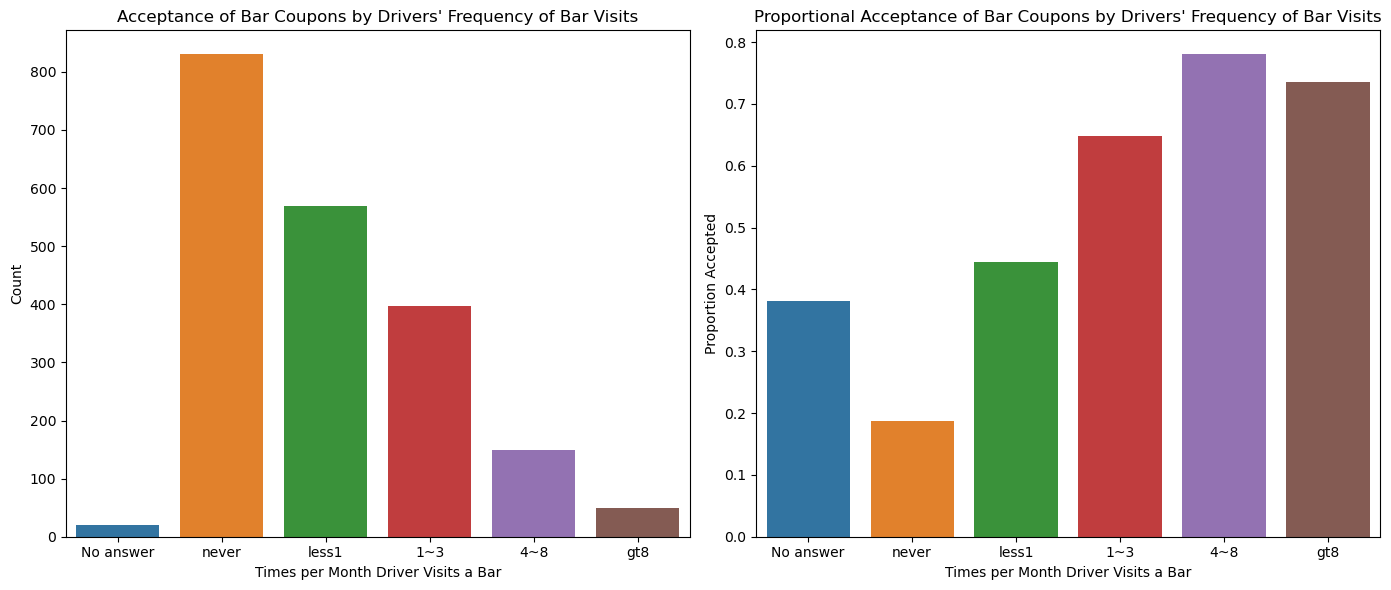

In [134]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# First plot
sns.countplot(data=just_bar_coupons, x='Bar', order=['No answer','never','less1','1~3','4~8','gt8'], ax=axes[0])
axes[0].set_title('Acceptance of Bar Coupons by Drivers\' Frequency of Bar Visits')
axes[0].set_xlabel('Times per Month Driver Visits a Bar')
axes[0].set_ylabel('Count')

# Compute the proportions
accepted_just_bar_coupons = just_bar_coupons[just_bar_coupons['Y'] == 1]
bar_freq_proportions = accepted_just_bar_coupons.groupby('Bar').size() / just_bar_coupons.groupby('Bar').size()
bar_freq_proportions = bar_freq_proportions.reset_index(name='proportion')

# Second plot
sns.barplot(data=bar_freq_proportions, x='Bar', y='proportion', order=['No answer','never','less1','1~3','4~8','gt8'], ax=axes[1])
axes[1].set_title('Proportional Acceptance of Bar Coupons by Drivers\' Frequency of Bar Visits')
axes[1].set_xlabel('Times per Month Driver Visits a Bar')
axes[1].set_ylabel('Proportion Accepted')

# Adjust the layout
plt.tight_layout()

# calculate acceptance rates between those who went to a bar 3 or fewer times a month to those who went more often
# Filter the dataframes for only the desired 'Bar' values
accepted_over_3 = accepted_just_bar_coupons[accepted_just_bar_coupons['Bar'].isin(['4~8', 'gt8'])]
accepted_under_3 = accepted_just_bar_coupons[accepted_just_bar_coupons['Bar'].isin(['never','less1','1~3'])]
total_over_3 = just_bar_coupons[just_bar_coupons['Bar'].isin(['4~8', 'gt8'])]
total_under_3 = just_bar_coupons[just_bar_coupons['Bar'].isin(['never','less1','1~3'])]

# Calculate the acceptance rate
bar_acceptance_3_or_fewer = accepted_under_3.size / total_under_3.size
bar_acceptance_more_than_3 = accepted_over_3.size / total_over_3.size

# print results
print(f'Of those who went to a bar 3 or fewer times a month, {term_colors.OKCYAN}{round(bar_acceptance_3_or_fewer*100,2)}%{term_colors.ENDC} of bar coupons were accepted')
print(f'Of those who went to a bar more than 3 times a month, {term_colors.OKCYAN}{round(bar_acceptance_more_than_3*100,2)}%{term_colors.ENDC} of bar coupons were accepted')


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Of those over the age of 25 who went to a bar 1 or more times a month, 69.52% of bar coupons were accepted.
Of those under the age of 25 who went to a bar less than once a month, 39.45% of bar coupons were accepted.

Yes, there is a difference in acceptance between the two groups.


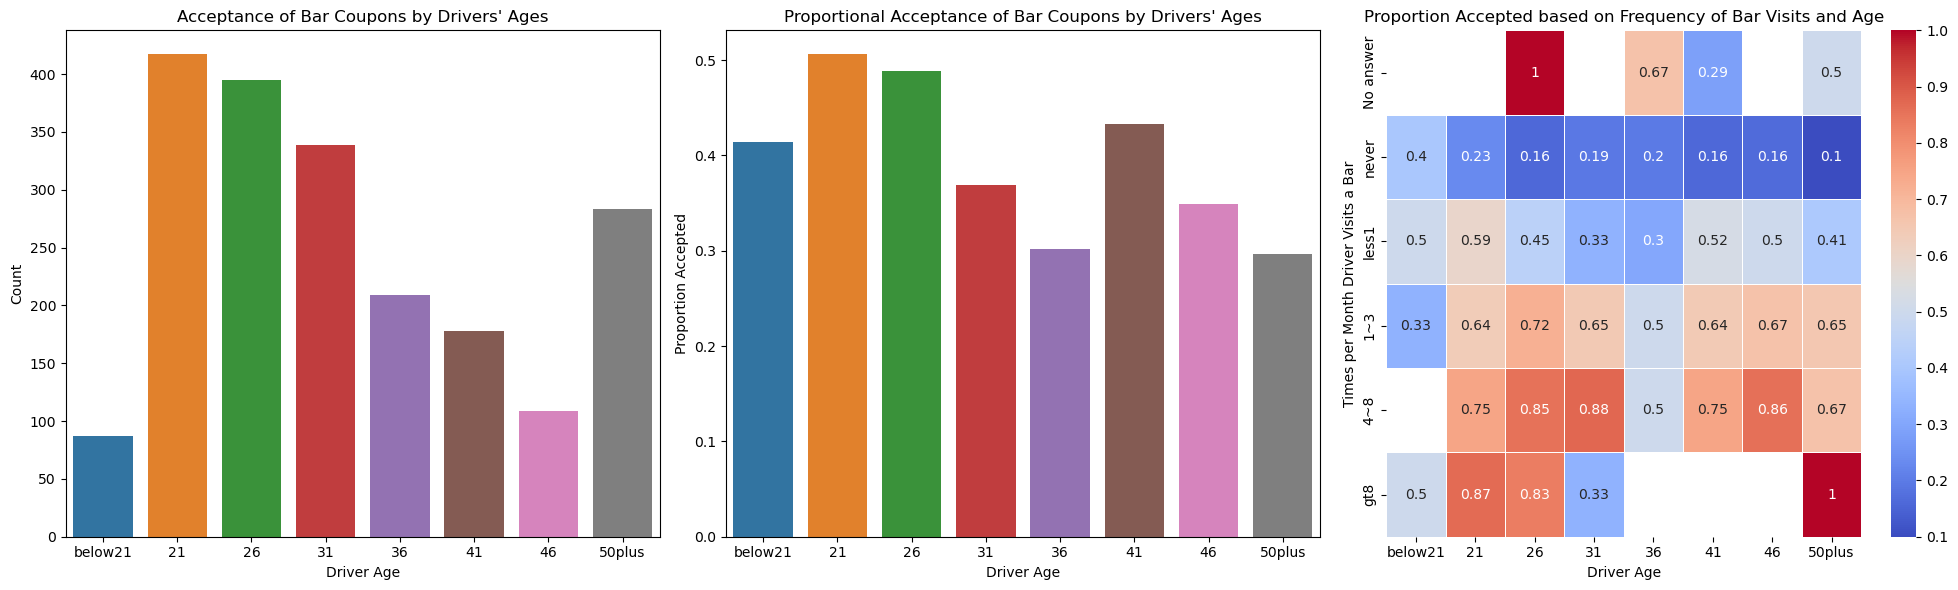

In [242]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# First plot: counts by age
sns.countplot(data=just_bar_coupons, x='age', order=['below21','21','26','31','36','41','46','50plus'], ax=axes[0])
axes[0].set_title('Acceptance of Bar Coupons by Drivers\' Ages')
axes[0].set_xlabel('Driver Age')
axes[0].set_ylabel('Count')

# Compute the proportions
age_proportions = accepted_just_bar_coupons.groupby('age').size() / just_bar_coupons.groupby('age').size()
age_proportions = age_proportions.reset_index(name='proportion')

# Second plot: proportion by age
sns.barplot(data=age_proportions, x='age', y='proportion', order=['below21','21','26','31','36','41','46','50plus'], ax=axes[1])
axes[1].set_title('Proportional Acceptance of Bar Coupons by Drivers\' Ages')
axes[1].set_xlabel('Driver Age')
axes[1].set_ylabel('Proportion Accepted')

# Third plot: Heatmap of Proportion Accepted
group_sizes = accepted_just_bar_coupons.groupby(['Bar', 'age']).size()
bar_and_age_freq_proportions = group_sizes / just_bar_coupons.groupby(['Bar', 'age']).size()
bar_and_age_freq_proportions = bar_and_age_freq_proportions.reset_index(name='proportion')
pivot_table = bar_and_age_freq_proportions.pivot(index='Bar', columns='age', values='proportion')
# Reorder rows and cols
pivot_table = pivot_table[['below21','21','26','31','36','41','46','50plus']]
pivot_table = pivot_table.loc[['No answer','never','less1','1~3','4~8','gt8']]
# Plot heatmap
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar=True, linewidths=.5, ax=axes[2])
axes[2].set_title('Proportion Accepted based on Frequency of Bar Visits and Age')
axes[2].set_ylabel('Times per Month Driver Visits a Bar')
axes[2].set_xlabel('Driver Age')

# Adjust the layout
plt.tight_layout()

# Calculate acceptance rates for drivers who go to a bar more than once a month and are over the age of 25, as well as the inverse of that group
bar_coupons_gt_1x_month_and_gt_25 = just_bar_coupons[
    (just_bar_coupons['Bar'].isin(['1~3','4~8','gt8'])) &
    (just_bar_coupons['age'].isin(['26', '31', '50plus', '36', '41', '46']))
]
bar_coupons_lt_1x_month_and_lt_25 = just_bar_coupons[
    (just_bar_coupons['Bar'].isin(['never','less1'])) &
    (just_bar_coupons['age'].isin(['below21','21']))
]
bar_acceptance_gt_1x_month_and_gt_25 = bar_coupons_gt_1x_month_and_gt_25.groupby('Y').size().loc[1] / bar_coupons_gt_1x_month_and_gt_25.groupby('Y').size().sum()
bar_acceptance_lt_1x_month_and_lt_25 = bar_coupons_lt_1x_month_and_lt_25.groupby('Y').size().loc[1] / bar_coupons_lt_1x_month_and_lt_25.groupby('Y').size().sum()

# Print our findings
print(f'Of those over the age of 25 who went to a bar 1 or more times a month, {term_colors.OKCYAN}{round(bar_acceptance_gt_1x_month_and_gt_25*100,2)}%{term_colors.ENDC} of bar coupons were accepted.')
print(f'Of those under the age of 25 who went to a bar less than once a month, {term_colors.OKCYAN}{round(bar_acceptance_lt_1x_month_and_lt_25*100,2)}%{term_colors.ENDC} of bar coupons were accepted.')
print('\nYes, there is a difference in acceptance between the two groups.')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Of those under who went to a bar at least once a month, did not have a kid as a passenger, and did not have farming, fishing & forestry as an occupation, 71.32% of bar coupons were accepted.


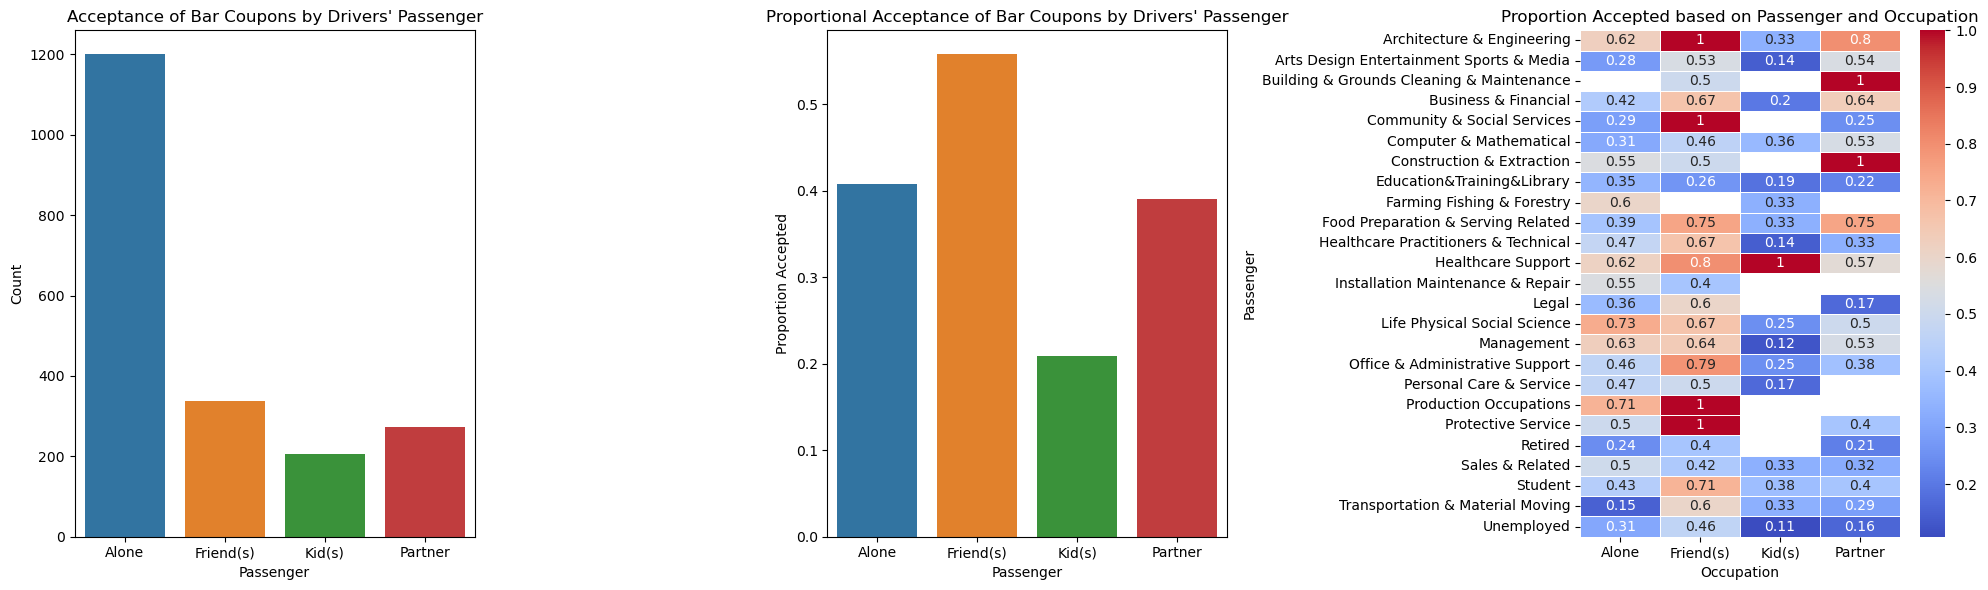

In [241]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# First plot: counts by age
sns.countplot(data=just_bar_coupons, x='passenger', order=['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], ax=axes[0])
axes[0].set_title('Acceptance of Bar Coupons by Drivers\' Passenger')
axes[0].set_xlabel('Passenger')
axes[0].set_ylabel('Count')

# Compute the proportions
passenger_proportions = accepted_just_bar_coupons.groupby('passenger').size() / just_bar_coupons.groupby('passenger').size()
passenger_proportions = passenger_proportions.reset_index(name='proportion')

# Second plot: proportion by age
sns.barplot(data=passenger_proportions, x='passenger', y='proportion', order=['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], ax=axes[1])
axes[1].set_title('Proportional Acceptance of Bar Coupons by Drivers\' Passenger')
axes[1].set_xlabel('Passenger')
axes[1].set_ylabel('Proportion Accepted')

# Third plot: heatmap
group_sizes = accepted_just_bar_coupons.groupby(['occupation', 'passenger']).size()
passenger_and_occupation_freq_proportions = group_sizes / just_bar_coupons.groupby(['occupation', 'passenger']).size()
passenger_and_occupation_freq_proportions = passenger_and_occupation_freq_proportions.reset_index(name='proportion')
pivot_table = passenger_and_occupation_freq_proportions.pivot(index='occupation', columns='passenger', values='proportion')
# reorder rows and cols
pivot_table = pivot_table[['Alone', 'Friend(s)', 'Kid(s)', 'Partner']]
# PLOT IT!
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar=True, linewidths=.5, ax=axes[2])
axes[2].set_title('Proportion Accepted based on Passenger and Occupation')
axes[2].set_ylabel('Passenger')
axes[2].set_xlabel('Occupation')

# Adjust the layout
plt.tight_layout()

# Calculate acceptance rate
bar_coupons_gt_1x_month_and_no_kid_and_not_farming = just_bar_coupons[
    (just_bar_coupons['Bar'].isin(['1~3','4~8','gt8'])) &
    (just_bar_coupons['passenger'] != "Kid(s)") &
    (just_bar_coupons['occupation'] != 'Farming Fishing & Forestry')
]
bar_acceptance_gt_1x_month_and_no_kid_and_not_farming = bar_coupons_gt_1x_month_and_no_kid_and_not_farming.groupby('Y').size().loc[1] / bar_coupons_gt_1x_month_and_no_kid_and_not_farming.groupby('Y').size().sum()

# Print findings
print(f"Of those under who went to a bar at least once a month, did not have a kid as a passenger, and did not have farming, fishing & forestry as an occupation, {term_colors.OKCYAN}{round(bar_acceptance_gt_1x_month_and_no_kid_and_not_farming*100,2)}%{term_colors.ENDC} of bar coupons were accepted.")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Of those under who went to a bar at least once a month, had passengers that were not a kid, and were not widowed, 71.32% of bar coupons were accepted.
Of those under who went to a bar at least once a month and are under the age of 30, 72.17% of bar coupons were accepted
Of those under who went to cheap restaurants more than 4 times a month and whose income is less than $50K, 45.35% of bar coupons were accepted


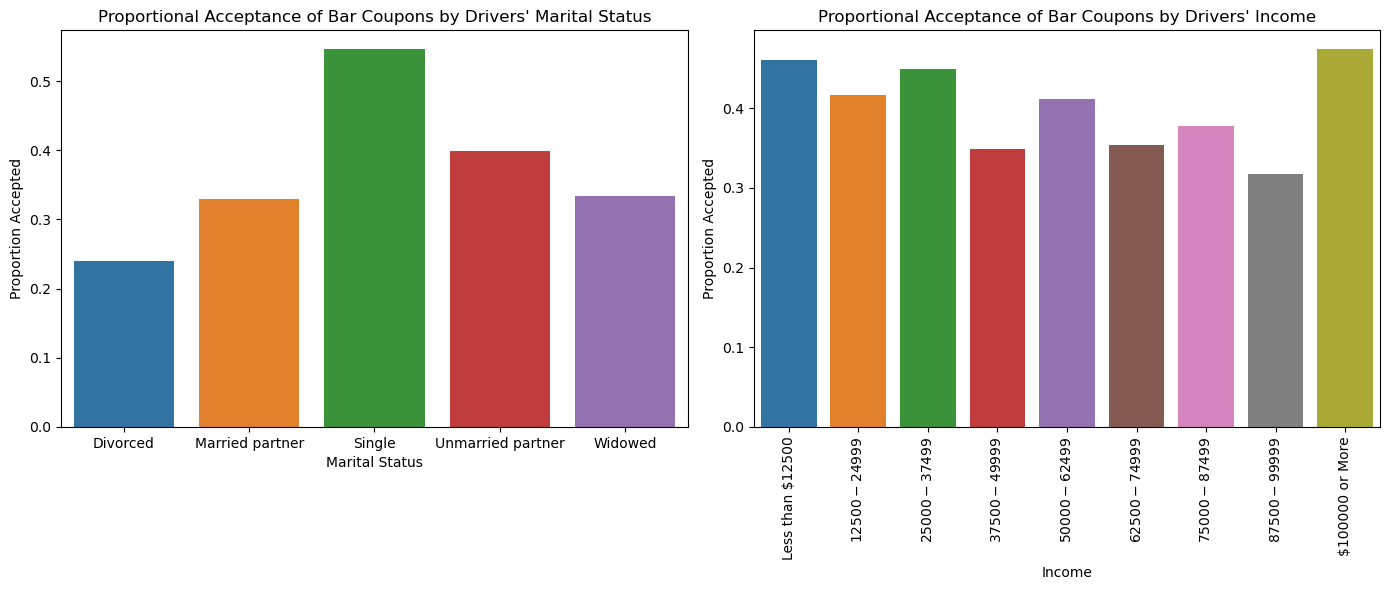

In [138]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Compute the proportions for 'maritalStatus'
marital_status_proportions = accepted_just_bar_coupons.groupby('maritalStatus').size() / just_bar_coupons.groupby('maritalStatus').size()
marital_status_proportions = marital_status_proportions.reset_index(name='proportion')

# First plot: proportion by 'maritalStatus'
sns.barplot(data=marital_status_proportions, x='maritalStatus', y='proportion', ax=axes[0])
axes[0].set_title('Proportional Acceptance of Bar Coupons by Drivers\' Marital Status')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Proportion Accepted')

# Compute the proportions for 'income'
income_proportions = accepted_just_bar_coupons.groupby('income').size() / just_bar_coupons.groupby('income').size()
income_proportions = income_proportions.reset_index(name='proportion')
# Second plot: proportion by 'income'
sns.barplot(data=income_proportions, x='income', y='proportion', order=['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'], ax=axes[1])
axes[1].set_title('Proportional Acceptance of Bar Coupons by Drivers\' Income')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Proportion Accepted')
plt.setp(axes[1].get_xticklabels(), rotation=90)

# Adjust the layout
plt.tight_layout()

# Calculate acceptance rates
bar_coupons_gt_1x_month_and_no_kid_and_not_widowed = just_bar_coupons[
    (just_bar_coupons['Bar'].isin(['1~3','4~8','gt8'])) &
    (just_bar_coupons['passenger'] != "Kid(s)") &
    (just_bar_coupons['maritalStatus'] != "Widowed")
]
bar_coupons_gt_1x_month_and_lt_30 = just_bar_coupons[
    (just_bar_coupons['Bar'].isin(['1~3','4~8','gt8'])) &
    (just_bar_coupons['age'].isin(['below21','21','26']))
]
bar_coupons_cheap_restaurants_gt_4x_month_and_income_lt_50 = just_bar_coupons[
    (just_bar_coupons['RestaurantLessThan20'].isin(['4~8','gt8'])) &
    (just_bar_coupons['income'].isin(['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']))
]
bar_acceptance_gt_1x_month_and_no_kid_and_not_widowed = bar_coupons_gt_1x_month_and_no_kid_and_not_widowed.groupby('Y').size().loc[1] / bar_coupons_gt_1x_month_and_no_kid_and_not_widowed.groupby('Y').size().sum()
bar_acceptance_gt_1x_month_and_lt_30 = bar_coupons_gt_1x_month_and_lt_30.groupby('Y').size().loc[1] / bar_coupons_gt_1x_month_and_lt_30.groupby('Y').size().sum()
bar_acceptance_cheap_restaurants_gt_4x_month_and_income_lt_50 = bar_coupons_cheap_restaurants_gt_4x_month_and_income_lt_50.groupby('Y').size().loc[1] / bar_coupons_cheap_restaurants_gt_4x_month_and_income_lt_50.groupby('Y').size().sum()

# Print our findings
print(f"Of those under who went to a bar at least once a month, had passengers that were not a kid, and were not widowed, {term_colors.OKCYAN}{round(bar_acceptance_gt_1x_month_and_no_kid_and_not_widowed*100,2)}%{term_colors.ENDC} of bar coupons were accepted.")
print(f"Of those under who went to a bar at least once a month and are under the age of 30, {term_colors.OKCYAN}{round(bar_acceptance_gt_1x_month_and_lt_30*100,2)}%{term_colors.ENDC} of bar coupons were accepted")
print(f"Of those under who went to cheap restaurants more than 4 times a month and whose income is less than $50K, {term_colors.OKCYAN}{round(bar_acceptance_cheap_restaurants_gt_4x_month_and_income_lt_50*100,2)}%{term_colors.ENDC} of bar coupons were accepted")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Frequency of Bar Visits**

Acceptance of the bar coupons generally increased with the monthly frequency that the driver visited bars.


**Passenger Type**

When we consider the effect passenger type had on acceptance, we saw that having a kid as a passenger reduced the acceptance rate for bar coupons, while having a friend as a passenger increased the acceptance rate for bar coupons.


**Marital Status**

With regards to marital status, single drivers were most likely to accept the bar coupons.


**Age**

There wasn't a drastic difference between acceptance of different age groups, but it's worth noting that drivers in their early twenties were most likely to take advantage of the bar coupons.


**Other Columns**

Of the other columns we looked at, there wasn't as strong of a correlation between acceptance and either income or occupation.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [150]:
# we'll look at the coffee coupons
# create dataframes to make our investigation easier
just_coffee_coupons = data[data['coupon'] == 'Coffee House']
accepted_just_coffee_coupons = just_coffee_coupons[just_coffee_coupons['Y'] == 1]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

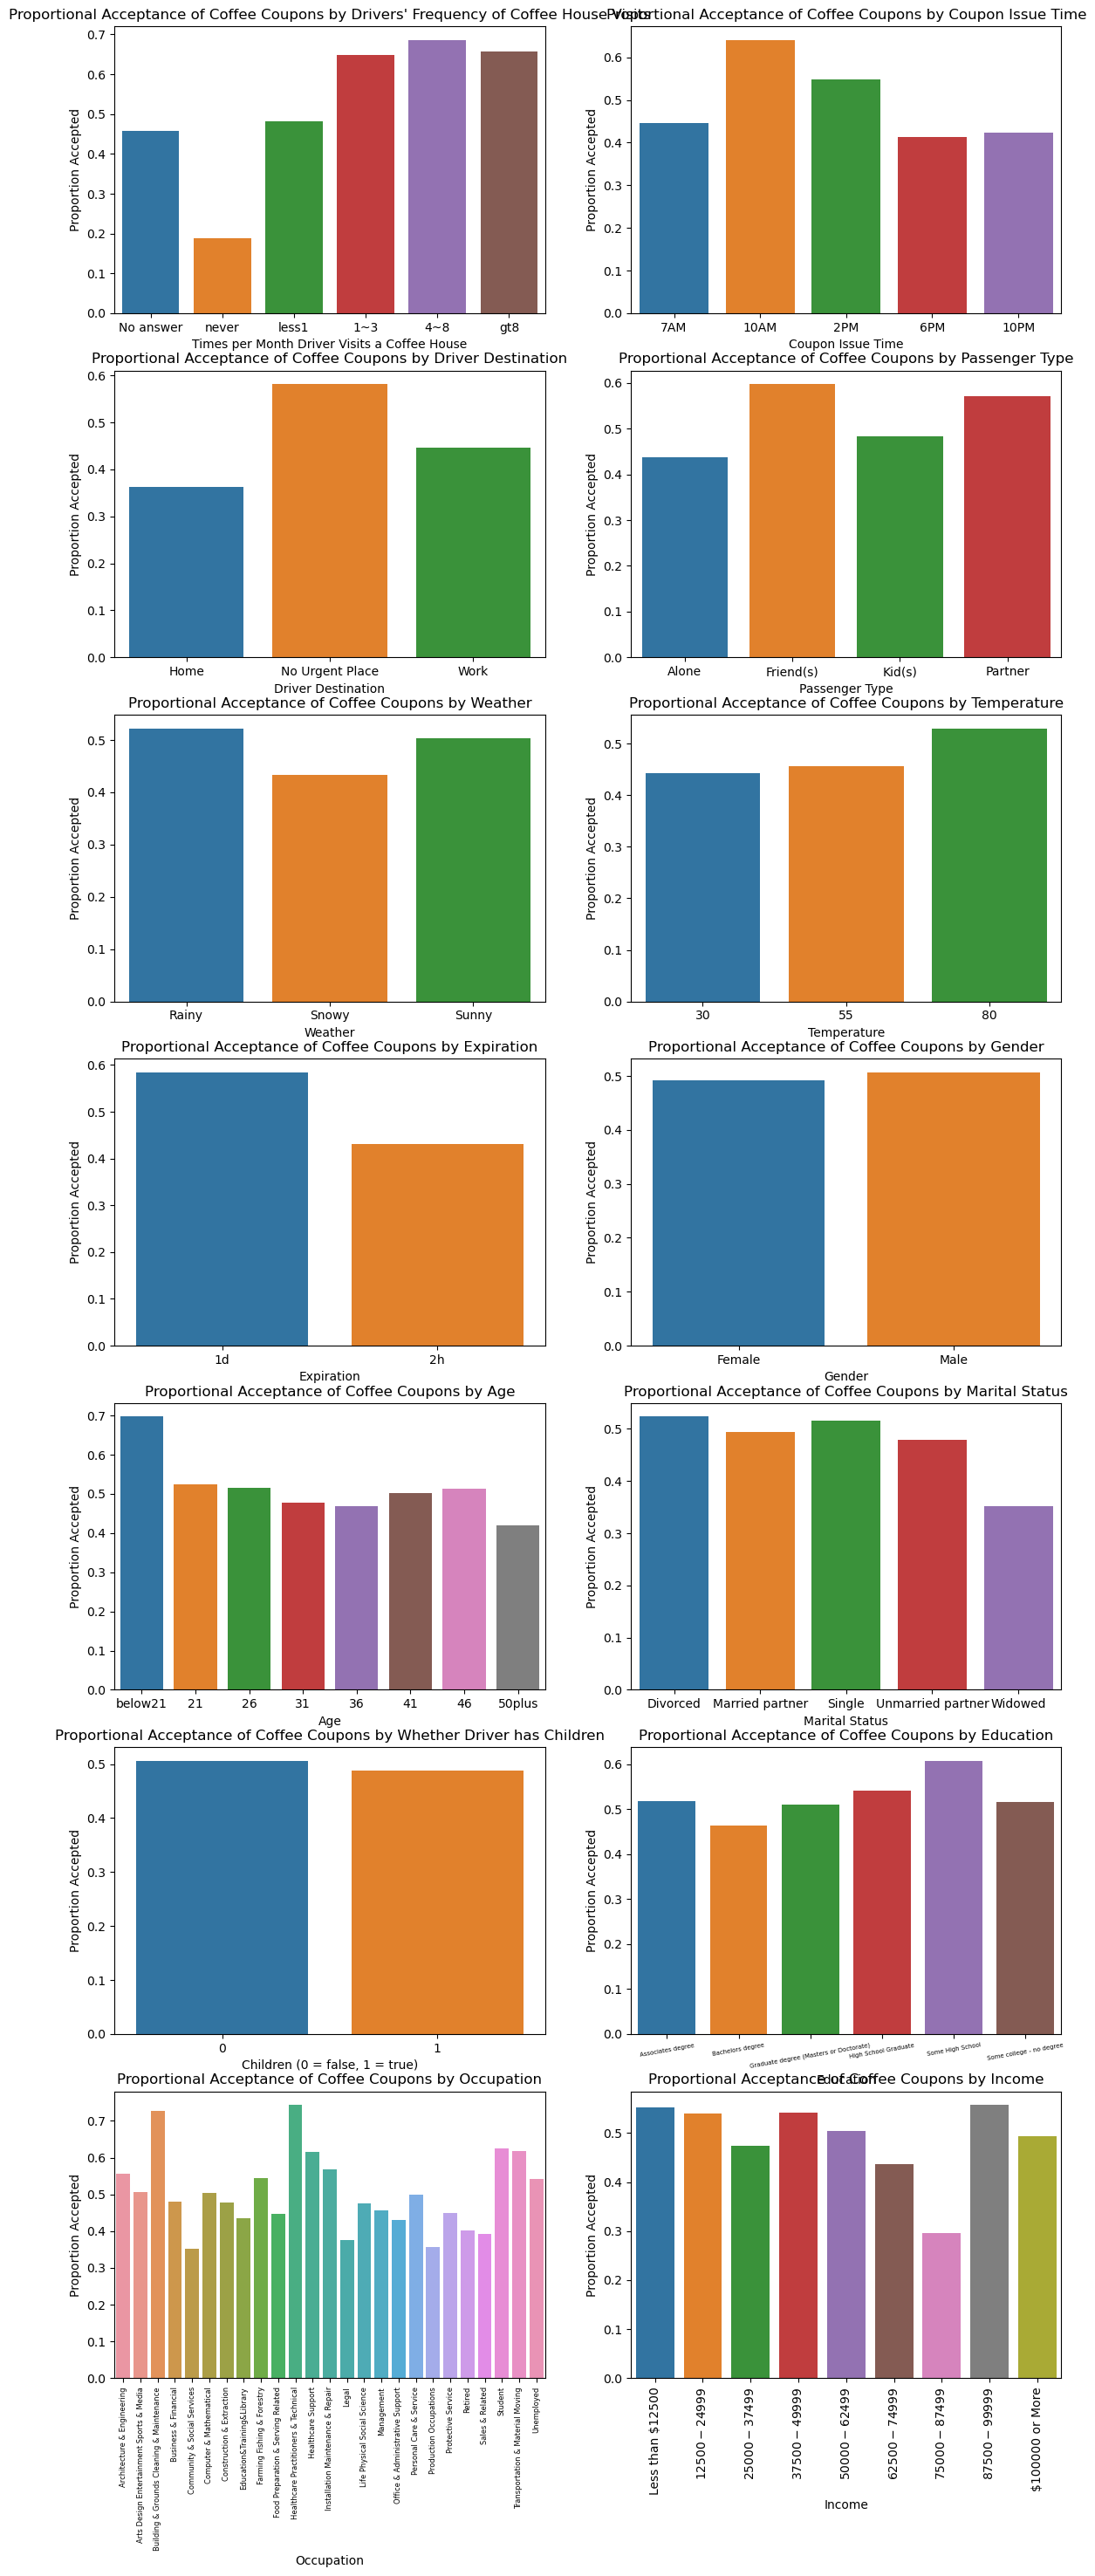

In [187]:
# Now we'll graph some of the columns to better understand the data
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 35))

# First plot: Frequency of coffee house visits
# Compute the proportions
coffee_freq_proportions = accepted_just_coffee_coupons.groupby('CoffeeHouse').size() / just_coffee_coupons.groupby('CoffeeHouse').size()
coffee_freq_proportions = coffee_freq_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_freq_proportions, x='CoffeeHouse', y='proportion', order=['No answer','never','less1','1~3','4~8','gt8'], ax=axes[0][0])
axes[0][0].set_title('Proportional Acceptance of Coffee Coupons by Drivers\' Frequency of Coffee House Visits')
axes[0][0].set_xlabel('Times per Month Driver Visits a Coffee House')
axes[0][0].set_ylabel('Proportion Accepted')

# Second plot: Time of coupon
# Compute the proportions
coffee_time_proportions = accepted_just_coffee_coupons.groupby('time').size() / just_coffee_coupons.groupby('time').size()
coffee_time_proportions = coffee_time_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_time_proportions, x='time', y='proportion', order=['7AM', '10AM', '2PM', '6PM', '10PM'], ax=axes[0][1])
axes[0][1].set_title('Proportional Acceptance of Coffee Coupons by Coupon Issue Time')
axes[0][1].set_xlabel('Coupon Issue Time')
axes[0][1].set_ylabel('Proportion Accepted')

# Third plot: Driver destination
# Compute the proportions
coffee_destination_proportions = accepted_just_coffee_coupons.groupby('destination').size() / just_coffee_coupons.groupby('destination').size()
coffee_destination_proportions = coffee_destination_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_destination_proportions, x='destination', y='proportion', ax=axes[1][0])
axes[1][0].set_title('Proportional Acceptance of Coffee Coupons by Driver Destination')
axes[1][0].set_xlabel('Driver Destination')
axes[1][0].set_ylabel('Proportion Accepted')

# Fourth plot: Passenger
# Compute the proportions
coffee_passenger_proportions = accepted_just_coffee_coupons.groupby('passenger').size() / just_coffee_coupons.groupby('passenger').size()
coffee_passenger_proportions = coffee_passenger_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_passenger_proportions, x='passenger', y='proportion', ax=axes[1][1])
axes[1][1].set_title('Proportional Acceptance of Coffee Coupons by Passenger Type')
axes[1][1].set_xlabel('Passenger Type')
axes[1][1].set_ylabel('Proportion Accepted')

# 5th plot: weather
# Compute the proportions
coffee_weather_proportions = accepted_just_coffee_coupons.groupby('weather').size() / just_coffee_coupons.groupby('weather').size()
coffee_weather_proportions = coffee_weather_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_weather_proportions, x='weather', y='proportion', ax=axes[2][0])
axes[2][0].set_title('Proportional Acceptance of Coffee Coupons by Weather')
axes[2][0].set_xlabel('Weather')
axes[2][0].set_ylabel('Proportion Accepted')

# 6th plot: temperature
# Compute the proportions
coffee_temperature_proportions = accepted_just_coffee_coupons.groupby('temperature').size() / just_coffee_coupons.groupby('temperature').size()
coffee_temperature_proportions = coffee_temperature_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_temperature_proportions, x='temperature', y='proportion', ax=axes[2][1])
axes[2][1].set_title('Proportional Acceptance of Coffee Coupons by Temperature')
axes[2][1].set_xlabel('Temperature')
axes[2][1].set_ylabel('Proportion Accepted')

# 7th plot: expiration
# Compute the proportions
coffee_expiration_proportions = accepted_just_coffee_coupons.groupby('expiration').size() / just_coffee_coupons.groupby('expiration').size()
coffee_expiration_proportions = coffee_expiration_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_expiration_proportions, x='expiration', y='proportion', ax=axes[3][0])
axes[3][0].set_title('Proportional Acceptance of Coffee Coupons by Expiration')
axes[3][0].set_xlabel('Expiration')
axes[3][0].set_ylabel('Proportion Accepted')

# 8th plot: gender
# Compute the proportions
coffee_gender_proportions = accepted_just_coffee_coupons.groupby('gender').size() / just_coffee_coupons.groupby('gender').size()
coffee_gender_proportions = coffee_gender_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_gender_proportions, x='gender', y='proportion', ax=axes[3][1])
axes[3][1].set_title('Proportional Acceptance of Coffee Coupons by Gender')
axes[3][1].set_xlabel('Gender')
axes[3][1].set_ylabel('Proportion Accepted')

# 9th plot: age
# Compute the proportions
coffee_age_proportions = accepted_just_coffee_coupons.groupby('age').size() / just_coffee_coupons.groupby('age').size()
coffee_age_proportions = coffee_age_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_age_proportions, x='age', y='proportion', order=['below21','21','26','31','36','41','46','50plus'], ax=axes[4][0])
axes[4][0].set_title('Proportional Acceptance of Coffee Coupons by Age')
axes[4][0].set_xlabel('Age')
axes[4][0].set_ylabel('Proportion Accepted')

# 10th plot: maritalStatus
# Compute the proportions
coffee_maritalStatus_proportions = accepted_just_coffee_coupons.groupby('maritalStatus').size() / just_coffee_coupons.groupby('maritalStatus').size()
coffee_maritalStatus_proportions = coffee_maritalStatus_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_maritalStatus_proportions, x='maritalStatus', y='proportion', ax=axes[4][1])
axes[4][1].set_title('Proportional Acceptance of Coffee Coupons by Marital Status')
axes[4][1].set_xlabel('Marital Status')
axes[4][1].set_ylabel('Proportion Accepted')

# 11th plot: has_children
# Compute the proportions
coffee_has_children_proportions = accepted_just_coffee_coupons.groupby('has_children').size() / just_coffee_coupons.groupby('has_children').size()
coffee_has_children_proportions = coffee_has_children_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_has_children_proportions, x='has_children', y='proportion', ax=axes[5][0])
axes[5][0].set_title('Proportional Acceptance of Coffee Coupons by Whether Driver has Children')
axes[5][0].set_xlabel('Children (0 = false, 1 = true)')
axes[5][0].set_ylabel('Proportion Accepted')

# 12th plot: education
# Compute the proportions
coffee_education_proportions = accepted_just_coffee_coupons.groupby('education').size() / just_coffee_coupons.groupby('education').size()
coffee_education_proportions = coffee_education_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_education_proportions, x='education', y='proportion', ax=axes[5][1])
axes[5][1].set_title('Proportional Acceptance of Coffee Coupons by Education')
axes[5][1].set_xlabel('Education')
axes[5][1].set_ylabel('Proportion Accepted')
plt.setp(axes[5][1].get_xticklabels(), rotation=10, size=5)

# 13th plot: occupation
# Compute the proportions
coffee_occupation_proportions = accepted_just_coffee_coupons.groupby('occupation').size() / just_coffee_coupons.groupby('occupation').size()
coffee_occupation_proportions = coffee_occupation_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_occupation_proportions, x='occupation', y='proportion', ax=axes[6][0])
axes[6][0].set_title('Proportional Acceptance of Coffee Coupons by Occupation')
axes[6][0].set_xlabel('Occupation')
axes[6][0].set_ylabel('Proportion Accepted')
plt.setp(axes[6][0].get_xticklabels(), rotation=90, size=6)

# 14th plot: income
# Compute the proportions
coffee_income_proportions = accepted_just_coffee_coupons.groupby('income').size() / just_coffee_coupons.groupby('income').size()
coffee_income_proportions = coffee_income_proportions.reset_index(name='proportion')
# plot it
sns.barplot(data=coffee_income_proportions, x='income', y='proportion', order=['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'], ax=axes[6][1])
axes[6][1].set_title('Proportional Acceptance of Coffee Coupons by Income')
axes[6][1].set_xlabel('Income')
axes[6][1].set_ylabel('Proportion Accepted')
plt.setp(axes[6][1].get_xticklabels(), rotation=90)

## Determining Characteristics of Drivers who Accept Coffee Coupons
After looking at proportional acceptance for difference columns in the dataset, I've determined that there a number of characteristics that seem correlated to acceptance of the coffee coupons. Below, I've made a list of the characteristics which I've determined to be most significant in the acceptance rate of the coffee coupons.

**Frequency of Coffee House Visits**

**Age**

**Time Coupon was Issued**

**Expiration of Coupon**

**Driver Destination**

In the cell below, you can see the calculations which led to these conclusions.

In [233]:
def calculate_acceptance(group):
    return str(round((group.groupby('Y').size().loc[1] / group.groupby('Y').size().sum()) * 100, 2)) + '%'

# Calculate acceptance rates for drivers who go to a coffee house more than once a month
coffee_coupons_gt_1x_month = just_coffee_coupons[
    just_coffee_coupons['CoffeeHouse'].isin(['1~3','4~8','gt8'])
]
# print results
print(f"{term_colors.BOLD}Frequency of Coffee House Visits{term_colors.ENDC}")
print(f"Drivers who never visit coffee houses accepted the coupon only {term_colors.OKCYAN}\
{round(coffee_freq_proportions.loc[coffee_freq_proportions['CoffeeHouse'] == 'never'][['proportion']].values[0][0]*100,2)}%{term_colors.ENDC}\
 of the time")
print(f"Drivers who visit coffee houses at least once a month accepted the coupon {term_colors.OKCYAN}\
{calculate_acceptance(coffee_coupons_gt_1x_month)}{term_colors.ENDC} of the time\n")

# Calculate acceptance rates for drivers whose age is under 21 and all other drivers
coffee_coupons_21_and_over = just_coffee_coupons[
    just_coffee_coupons['age'] != 'below21'
]
coffee_coupons_below_21 = just_coffee_coupons[
    just_coffee_coupons['age'] == 'below21'
]
# print results
print(f"{term_colors.BOLD}Age{term_colors.ENDC}")
print(f"Drivers who were over 21 years old accepted the coupon only {term_colors.OKCYAN}\
{calculate_acceptance(coffee_coupons_21_and_over)}{term_colors.ENDC} of the time")
print(f"Drivers who were under 21 years old accepted the coupon {term_colors.OKCYAN}\
{calculate_acceptance(coffee_coupons_below_21)}{term_colors.ENDC} of the time\n")

# Calculate acceptance rates for three different groups of coupon issue time: 10AM, 2PM, and all others
coffee_coupons_10AM = just_coffee_coupons[
    just_coffee_coupons['time'] == '10AM'
]
coffee_coupons_2PM = just_coffee_coupons[
    just_coffee_coupons['time'] == '2PM'
]
coffee_coupons_other_times = just_coffee_coupons[
    ~just_coffee_coupons['time'].isin(['10AM','2PM'])
]
# print results
print(f"{term_colors.BOLD}Time Coupon was Issued{term_colors.ENDC}")
print(f"Coupons issued before 10AM or after 2PM were accepted only {term_colors.OKCYAN}\
{calculate_acceptance(coffee_coupons_other_times)}{term_colors.ENDC} of the time")
print(f"Coupons issued at 2PM were accepted {term_colors.OKCYAN}\
{calculate_acceptance(coffee_coupons_2PM)}{term_colors.ENDC} of the time")
print(f"Coupons issued at 10AM were accepted {term_colors.OKCYAN}\
{calculate_acceptance(coffee_coupons_10AM)}{term_colors.ENDC} of the time\n")

# Calculate acceptance rates for expiration time
coffee_coupons_2h_expiration = just_coffee_coupons[
    just_coffee_coupons['expiration'] == '2h'
]
coffee_coupons_1d_expiration = just_coffee_coupons[
    just_coffee_coupons['expiration'] == '1d'
]
# print results
print(f"{term_colors.BOLD}Expiration of Coupon{term_colors.ENDC}")
print(f"Coupons issued with a 2 hour expiration were accepted only {term_colors.OKCYAN}\
{calculate_acceptance(coffee_coupons_2h_expiration)}{term_colors.ENDC} of the time")
print(f"Coupons issued with a 1 day expiration were accepted {term_colors.OKCYAN}\
{calculate_acceptance(coffee_coupons_1d_expiration)}{term_colors.ENDC} of the time\n")

# Calculate acceptance rates for drivers whose destination is "No Urgent Place" and all other drivers
coffee_coupons_other_destinations = just_coffee_coupons[
    just_coffee_coupons['destination'] != 'No Urgent Place'
]
coffee_coupons_no_urgent_destination = just_coffee_coupons[
    just_coffee_coupons['destination'] == 'No Urgent Place'
]
coffee_coupons_other_destinations = coffee_coupons_other_destinations.groupby('Y').size().loc[1] / coffee_coupons_other_destinations.groupby('Y').size().sum()
coffee_acceptance_no_urgent_destination = coffee_coupons_no_urgent_destination.groupby('Y').size().loc[1] / coffee_coupons_no_urgent_destination.groupby('Y').size().sum()
# print results
print(f"{term_colors.BOLD}Driver Destination{term_colors.ENDC}")
print(f"Drivers who had a destination in mind accepted the coupon only {term_colors.OKCYAN}\
{round(coffee_coupons_other_destinations*100,2)}%{term_colors.ENDC} of the time")
print(f"Drivers who had no urgent destination accepted the coupon {term_colors.OKCYAN}\
{round(coffee_acceptance_no_urgent_destination*100,2)}%{term_colors.ENDC} of the time\n")

Frequency of Coffee House Visits
Drivers who never visit coffee houses accepted the coupon only 18.88% of the time
Drivers who visit coffee houses at least once a month accepted the coupon 66.02% of the time

Age
Drivers who were over 21 years old accepted the coupon only 49.13% of the time
Drivers who were under 21 years old accepted the coupon 69.68% of the time

Time Coupon was Issued
Coupons issued before 10AM or after 2PM were accepted only 42.73% of the time
Coupons issued at 2PM were accepted 54.79% of the time
Coupons issued at 10AM were accepted 64.07% of the time

Expiration of Coupon
Coupons issued with a 2 hour expiration were accepted only 43.2% of the time
Coupons issued with a 1 day expiration were accepted 58.39% of the time

Driver Destination
Drivers who had a destination in mind accepted the coupon only 40.36% of the time
Drivers who had no urgent destination accepted the coupon 58.1% of the time

